# CHAPTER 2 - The Tools of the Trade in Quantum Computing - Qiskit Code

*Note*: You may skip the following two cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService  # New import for IBMQ functionality
import numpy as np

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)

In [3]:
qc = QuantumCircuit(3,1)

In [4]:
qc.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 1/

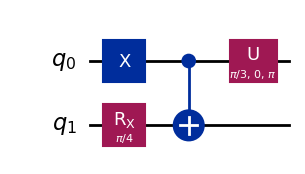

In [5]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")

In [6]:
from qiskit_aer import Aer

In [7]:
sim = Aer.get_backend('aer_simulator')

In [11]:
# Create Quantum Circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure([0, 1], [0, 1])

# Transpile the circuit for AerSimulator
qc = transpile(qc, sim)

# Run the circuit on AerSimulator
result = sim.run(qc, shots=1024).result()

# Get results
counts = result.get_counts()
print(counts)


{'00': 519, '01': 505}


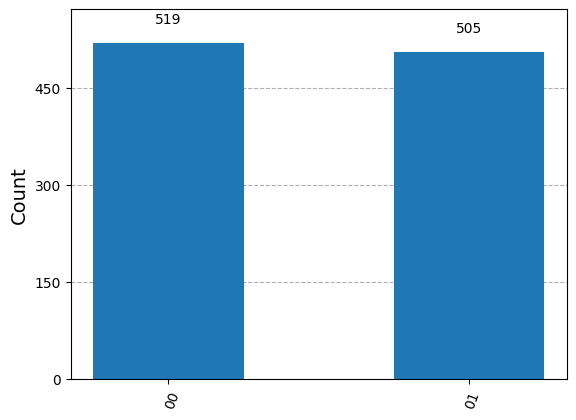

In [12]:
from qiskit.visualization import *
plot_histogram(counts)

In [13]:
# Define the unitary simulator backend
sim_u = Aer.get_backend('aer_simulator')

# Create a Quantum Circuit
qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()

# Transpile the circuit for the AerSimulator
qc = transpile(qc, sim_u)

# Run the circuit using AerSimulator
result = sim_u.run(qc).result()

# Get the unitary matrix
U = result.get_unitary(decimals=4)
print(U)

Operator([[ 0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j]],
         input_dims=(2,), output_dims=(2,))


*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [15]:
YOUR_IBM_TOKEN =""
service = QiskitRuntimeService(channel="ibm_quantum", token=YOUR_IBM_TOKEN)

In [16]:
# List available backends
backends = service.backends(simulator=False)
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [17]:
# Filter available backends with at least 5 qubits
dev_list = [
    backend for backend in service.backends()
    if backend.num_qubits >= 5 and not backend.simulator
]

In [38]:
# Find the least busy backend
dev = min(dev_list, key=lambda b: b.status().pending_jobs)
print(f"Selected least busy backend: {dev.name}")

Selected least busy backend: ibm_kyiv


In [57]:
from qiskit_ibm_runtime import Sampler, QiskitRuntimeService, Session
from qiskit_aer import AerSimulator
from qiskit import transpile, QuantumCircuit
from collections import Counter

# Set up a simple circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Run locally using AerSimulator
sim = Aer.get_backend('aer_simulator')
qc_sim = transpile(qc, sim)  # ✅ Transpile for the simulator
result = sim.run(qc_sim, shots=1024).result()
counts_sim = result.get_counts()

# Run on IBM Quantum using Sampler (✅ FINAL FIX)
with Session(backend=dev) as session:  # ✅ Create a session with the selected backend
    sampler = Sampler(session)

    # ✅ Transpile the circuit for the selected IBM backend
    qc_ibm = transpile(qc, backend=dev)  # ✅ Ensures compatibility

    job = sampler.run([qc_ibm])  # ✅ Use transpiled circuit

    # Wait for the job to finish
    job.wait_for_final_state()

    result = job.result()
    # Extract measurement results from IBM Quantum
    raw_results = result[0].data.meas  # ✅ Get raw bitstrings
    
    # ✅ Extract bitstrings correctly (this is the right method!)
    bitstrings = raw_results.get_bitstrings()  # ✅ THIS. IS. IT.
    
    # ✅ Convert to counts dictionary (like get_counts)
    counts_dev = dict(Counter(bitstrings))

In [59]:
print("Simulator Results:", counts_sim)
print("IBM Quantum Results:", counts_dev)

Simulator Results: {'00': 524, '11': 500}
IBM Quantum Results: {'01': 64, '11': 2059, '00': 1926, '10': 47}


In [60]:
pip freeze > requirements_qiskit.txt

Note: you may need to restart the kernel to use updated packages.
